In [91]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn
from scipy import stats

[1.04, 1.27, 0.41, 1.37, 1.02, 0.66, 0.03, 2.89, 0.17, 1.19, 2.22, 0.47, 1.13, 1.03, 0.38, 0.16, 2.37, 4.39, 0.68, 0.54, 0.31, 0.02, 0.83, 0.46, 0.53]


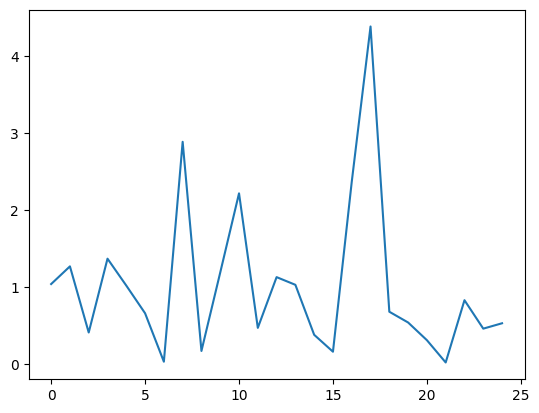

In [92]:
xn = []
N = 25
for i in range(N):
  xn.append(round(np.random.exponential(1), 2))
print(xn)
plt.plot(xn)

In [93]:
xn_s = np.sort(xn)
print("вариационный ряд:", xn_s)

вариационный ряд: [0.02 0.03 0.16 0.17 0.31 0.38 0.41 0.46 0.47 0.53 0.54 0.66 0.68 0.83
 1.02 1.03 1.04 1.13 1.19 1.27 1.37 2.22 2.37 2.89 4.39]


In [94]:
median = xn_s[12]
scope = xn_s[n - 1] - xn_s[0]
alpha1 = np.mean(xn)
mu2 = 0
mu3 = 0
for xi in xn:
  mu2 += ((xi - alpha1) ** 2) / n
  mu3 += ((xi - alpha1) ** 3) / n
gamma = mu3 / ((mu2) ** (3/2))

print("оценка первого момента(мат. ожидания):", alpha1)
print("оценка коэффициента ассиметрии:", gamma)
print("размах:", scope)
print("медиана:", median)
print("мода", xn_s)

оценка первого момента(мат. ожидания): 1.0228
оценка коэффициента ассиметрии: 1.826351888348627
размах: 4.37
медиана: 0.68
мода [0.02 0.03 0.16 0.17 0.31 0.38 0.41 0.46 0.47 0.53 0.54 0.66 0.68 0.83
 1.02 1.03 1.04 1.13 1.19 1.27 1.37 2.22 2.37 2.89 4.39]


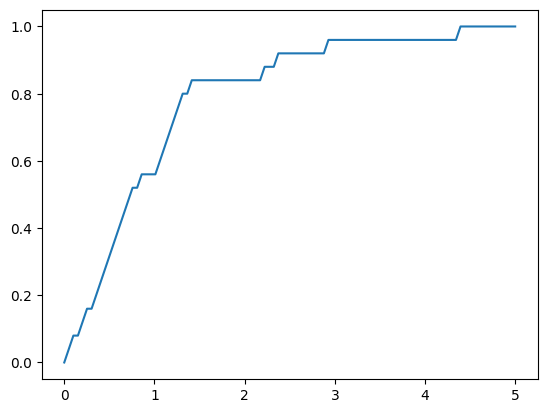

In [95]:
# Эмпирическая
x_tmp = np.linspace (0, 5, 100)

nu = []
it = 0
for x in x_tmp:
    if (it < N and x > xn_s[it]):
        it += 1
    nu.append (it / N)

plt.plot (x_tmp, nu)

(array([0.64073227, 0.64073227, 0.54919908, 0.09153318, 0.        ,
        0.18306636, 0.09153318, 0.        , 0.        , 0.09153318]),
 array([0.02 , 0.457, 0.894, 1.331, 1.768, 2.205, 2.642, 3.079, 3.516,
        3.953, 4.39 ]),
 <BarContainer object of 10 artists>)

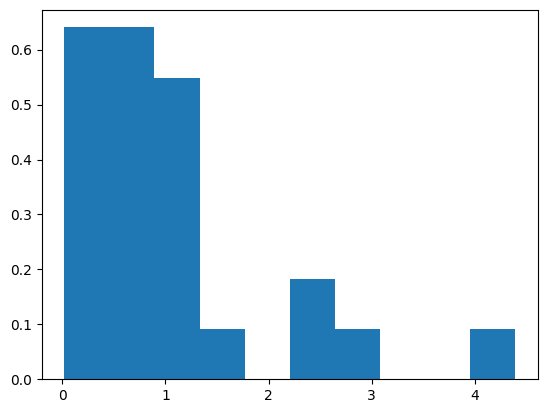

In [96]:
# Гистограмма
plt.hist (xn, density = True, histtype = 'bar')

x25:  0.395
x75:  1.23
xmin:  0.02
xmax:  4.39
Выбросы: 
2.89
4.39


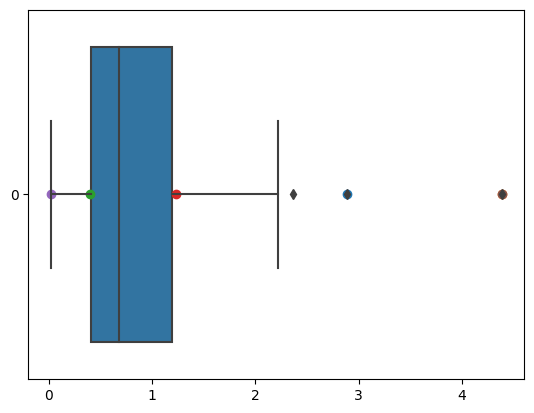

In [97]:
seaborn.boxplot (xn_s, orient = 'h')

x25 = (xn_s[5] + xn_s[6]) / 2
x75 = (xn_s[18] + xn_s[19]) / 2
xmin = xn_s[0]
xmax = xn_s[24]

print ("x25: ", x25)
print ("x75: ", x75)
print ("xmin: ", xmin)
print ("xmax: ", xmax)

e = x75 - x25
print ("Выбросы: ")
for x in xn_s:
    if (x < x25 - 1.5 * e or x > x75 + 1.5 * e):
        print (x)
        plt.scatter (x, 0)
plt.scatter (x25, 0)
plt.scatter (x75, 0)
plt.scatter (xmin, 0)
plt.scatter (xmax, 0)

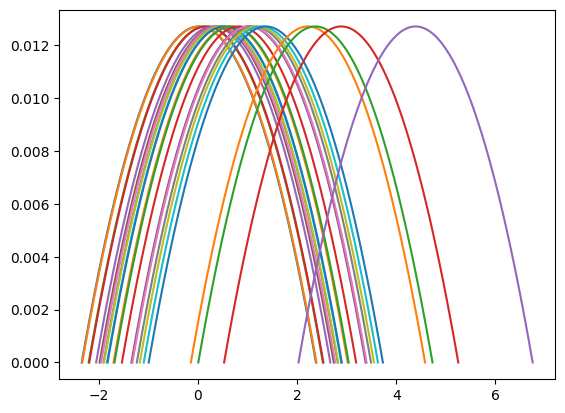

In [98]:
#Ядерная оценка плотности
s = math.sqrt(mu2 * N / (N - 1))
h = 2.344 * (s / math.pow (s, 1/5))

kernel = []
for x in xn_s:
    x_U = np.linspace (x - h, x + h, 100)
    kernel_i = (3 / (4 * N * h)) * ( 1 - ((x_U - x) / h) ** 2 )
    kernel.append (kernel_i)
    plt.plot (x_U, kernel_i)

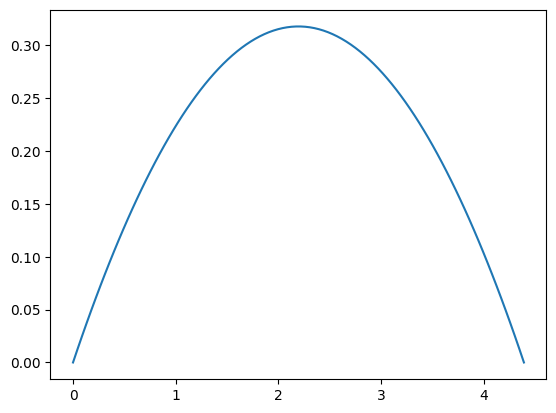

In [99]:
#Сумма
kernel_sum = np.sum (kernel, axis=0)
plt.plot (np.linspace (0, xn_s[N - 1], 100), kernel_sum)

Оценка первого момента:  1.0228
Оценка второго момента:  2.02366


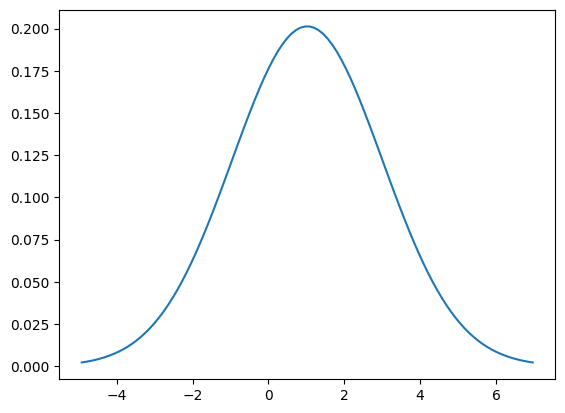

In [100]:
#Плотность распределения среднего арифметического элементов выборки
print ("Оценка первого момента: ", alpha1)

alpha2 = 0
for x in xn:
    alpha2 += (x)**2 / N
print ("Оценка второго момента: ", alpha2)

mu = alpha1
sigma = alpha2 - alpha1**2 / N

X_norm = np.linspace (mu - 3 * sigma, mu + 3 * sigma, 100)
Y_norm = stats.norm.pdf (X_norm, mu, sigma)

plt.plot (X_norm, Y_norm)

(array([0.13855751, 0.66199697, 1.47024909, 1.8859216 , 1.66269007,
        1.1007624 , 0.55423002, 0.15395278, 0.0384882 , 0.02309292]),
 array([0.5156 , 0.64564, 0.77568, 0.90572, 1.03576, 1.1658 , 1.29584,
        1.42588, 1.55592, 1.68596, 1.816  ]),
 <BarContainer object of 10 artists>)

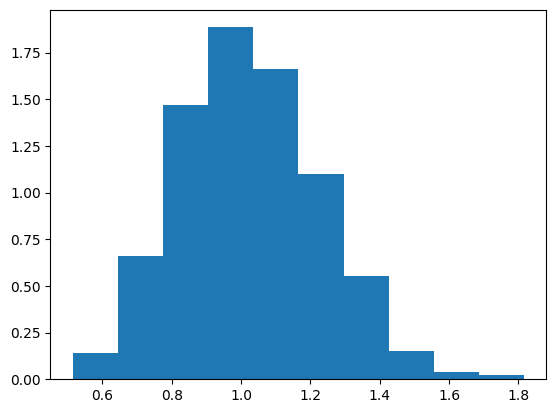

In [101]:
#Бутстраповская оценка плотности распределения среднего арифметического
boot_alpha1 = []
for i in range (1, 1000):
    xn_random = np.random.choice (xn, size = N)
    boot_alpha1.append (np.mean (xn_random))
plt.hist(boot_alpha1, density=True, histtype='bar')

(array([0.01855096, 0.02968154, 0.08904461, 0.14840769, 0.21148095,
        0.32649691, 0.50087594, 0.71606709, 0.78656074, 0.88302573]),
 array([-0.21717437,  0.05235344,  0.32188126,  0.59140908,  0.8609369 ,
         1.13046472,  1.39999254,  1.66952036,  1.93904817,  2.20857599,
         2.47810381]),
 <BarContainer object of 10 artists>)

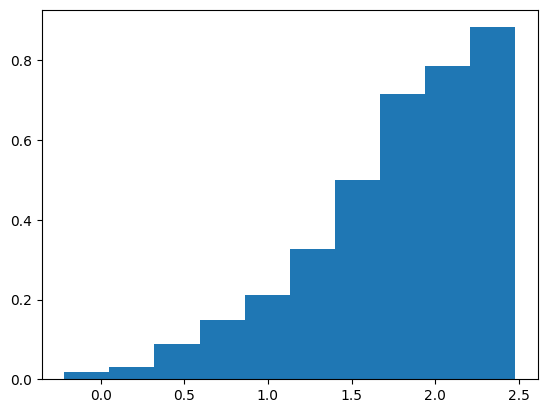

In [102]:
#Бутстраповская оценка плотности распределения коэффициента ассиметрии

boot_gamma_n = []
for i in range (1000):
    xn_random = np.random.choice (xn, size = N)
    boot_mean = np.mean (xn_random)

    boot_mu2 = 0
    boot_mu3 = 0
    for x in xn:
        boot_mu2 += ((x - boot_mean) ** 2) / N
        boot_mu3 += ((x - boot_mean) ** 3) / N

    boot_gamma = boot_mu3 / (boot_mu2 ** (3/2))
    boot_gamma_n.append (boot_gamma)
plt.hist (boot_gamma_n, density=True, histtype='bar')